In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
/Users/Tanner/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
#read in data
df = pd.read_csv('./data/df.csv', index_col=None, header=0)
df.head()

,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,...,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,All-Star
0,AJ Hammons_2017,DAL,24.0,22.0,4.0,18.0,163.0,48.0,17.0,42.0,...,4.0,10.0,1.0,13.0,21.0,129.2,0.0,0.0,-5.0,0.0
1,Aaron Brooks_2017,IND,32.0,65.0,36.0,29.0,894.0,322.0,121.0,300.0,...,125.0,66.0,25.0,9.0,93.0,628.3,0.0,0.0,-32.0,0.0
2,Aaron Gordon_2017,ORL,21.0,80.0,29.0,51.0,2298.0,1019.0,393.0,865.0,...,150.0,89.0,65.0,40.0,172.0,1956.0,7.0,0.0,-163.0,0.0
3,Aaron Harrison_2017,CHA,22.0,5.0,2.0,3.0,17.0,1.0,0.0,4.0,...,3.0,0.0,0.0,0.0,2.0,9.1,0.0,0.0,-5.0,0.0
4,Adreian Payne_2017,MIN,26.0,18.0,5.0,13.0,135.0,63.0,23.0,54.0,...,7.0,8.0,8.0,7.0,32.0,150.1,0.0,0.0,8.0,0.0


$$Data Dictionary$$

| Abbreviation | Definition |
|---|---|
|GP |Games Played 
|W |Wins 
|L |Losses 
|MIN |Minutes Played 
|FGM |Field Goals Made 
|FGA |Field Goals Attempted 
|FG% |Field Goal Percentage 
|3PM |3 Point Field Goals Made 
|3PA |3 Point Field Goals Attempted 
|3P% |3 Point Field Goals Percentage 
|FTM |Free Throws Made 
|FTA |Free Throws Attempted 
|FT% |Free Throw Percentage 
|OREB |Offensive Rebounds 
|DREB |Defensive Rebounds 
|REB |Rebounds AST Assists 
|TOV |Turnovers 
|STL |Steals 
|BLK |Blocks 
|PF |Personal Fouls 
|FP |Fantasy Points 
|DD2 |Double doubles 
|TD3 |Triple doubles 
|PTS |Points 
|+/- |Plus Minus Ratio

In [3]:
#Shape of the data
df.shape

(8946, 30)

In [4]:
#Mean of the Data
df.mean()

AGE           27.086762
GP            53.201476
W             26.562276
L             26.639199
MIN         1249.297853
PTS          515.023256
FGM          192.341123
FGA          424.875783
FG%           43.489926
3PM           36.394902
3PA          102.133274
3P%           24.092151
FTM           93.946109
FTA          124.102415
FT%           70.019365
OREB          57.471713
DREB         161.660555
REB          219.132267
AST          112.909213
TOV           71.458408
STL           39.229875
BLK           25.292487
PF           108.614490
FP          1069.454472
DD2            4.389758
TD3            0.107223
+/-           -0.338663
All-Star       0.054773
dtype: float64

In [5]:
df['YEAR'] = [int(i[-4:]) for i in df['PLAYER']]

In [6]:
df.head()

,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,...,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,All-Star,YEAR
0,AJ Hammons_2017,DAL,24.0,22.0,4.0,18.0,163.0,48.0,17.0,42.0,...,10.0,1.0,13.0,21.0,129.2,0.0,0.0,-5.0,0.0,2017
1,Aaron Brooks_2017,IND,32.0,65.0,36.0,29.0,894.0,322.0,121.0,300.0,...,66.0,25.0,9.0,93.0,628.3,0.0,0.0,-32.0,0.0,2017
2,Aaron Gordon_2017,ORL,21.0,80.0,29.0,51.0,2298.0,1019.0,393.0,865.0,...,89.0,65.0,40.0,172.0,1956.0,7.0,0.0,-163.0,0.0,2017
3,Aaron Harrison_2017,CHA,22.0,5.0,2.0,3.0,17.0,1.0,0.0,4.0,...,0.0,0.0,0.0,2.0,9.1,0.0,0.0,-5.0,0.0,2017
4,Adreian Payne_2017,MIN,26.0,18.0,5.0,13.0,135.0,63.0,23.0,54.0,...,8.0,8.0,7.0,32.0,150.1,0.0,0.0,8.0,0.0,2017


In [7]:
#Playing with Min, max to see worst in best player over last 20 years given '+/-'
df['+/-'].max()

1072.0

In [8]:
df[df['+/-'] == 1072.0]

,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,...,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,All-Star,YEAR
1480,Draymond Green_2016,GSW,26.0,81.0,73.0,8.0,2808.0,1131.0,401.0,819.0,...,259.0,119.0,113.0,240.0,3387.8,33.0,13.0,1072.0,1.0,2016


In [9]:
df['+/-'].min()

-684.0

In [10]:
df[df['+/-'] == -684.0]

,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,...,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,All-Star,YEAR
1748,Roy Hibbert_2016,LAL,29.0,81.0,17.0,64.0,1878.0,481.0,182.0,411.0,...,76.0,32.0,110.0,252.0,1451.1,3.0,0.0,-684.0,0.0,2016


In [11]:
#Used this to look at very specific players
df[df['PLAYER'].str.contains('Lillard',regex = False)].sort_values("YEAR")

,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,...,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,All-Star,YEAR
6530,Damian Lillard_2013,POR,22.0,82.0,33.0,49.0,3167.0,1562.0,553.0,1288.0,...,243.0,74.0,19.0,172.0,2702.9,7.0,0.0,-62.0,0.0,2013
1925,Damian Lillard_2014,POR,23.0,82.0,54.0,28.0,2937.0,1695.0,553.0,1304.0,...,193.0,64.0,22.0,197.0,2791.1,6.0,0.0,358.0,1.0,2014
2403,Damian Lillard_2015,POR,24.0,82.0,51.0,31.0,2925.0,1720.0,590.0,1360.0,...,222.0,97.0,21.0,164.0,3066.1,6.0,0.0,305.0,1.0,2015
1449,Damian Lillard_2016,POR,25.0,75.0,40.0,35.0,2676.0,1879.0,618.0,1474.0,...,242.0,65.0,28.0,165.0,3046.4,15.0,0.0,94.0,0.0,2016
89,Damian Lillard_2017,POR,26.0,75.0,38.0,37.0,2693.0,2024.0,661.0,1488.0,...,197.0,68.0,20.0,152.0,3192.6,11.0,0.0,80.0,0.0,2017
7891,Damian Lillard_2018,POR,27.0,73.0,44.0,29.0,2670.0,1962.0,621.0,1415.0,...,206.0,77.0,27.0,117.0,3179.5,11.0,0.0,345.0,1.0,2018
8471,Damian Lillard_2019,POR,28.0,80.0,51.0,29.0,2838.0,2067.0,681.0,1533.0,...,212.0,88.0,34.0,148.0,3492.7,13.0,0.0,494.0,1.0,2019


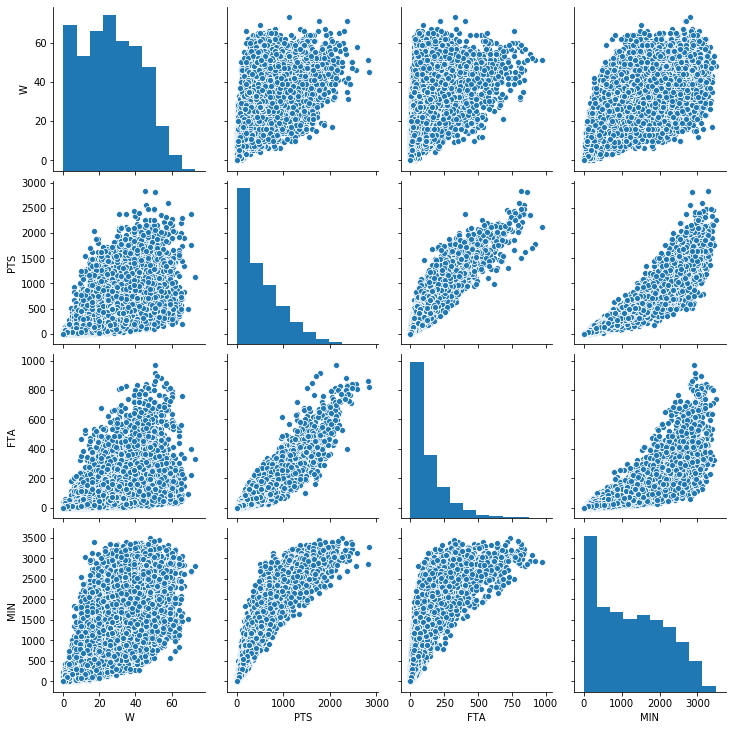

In [12]:
sns.pairplot(df[['W','PTS','FTA','MIN']]);

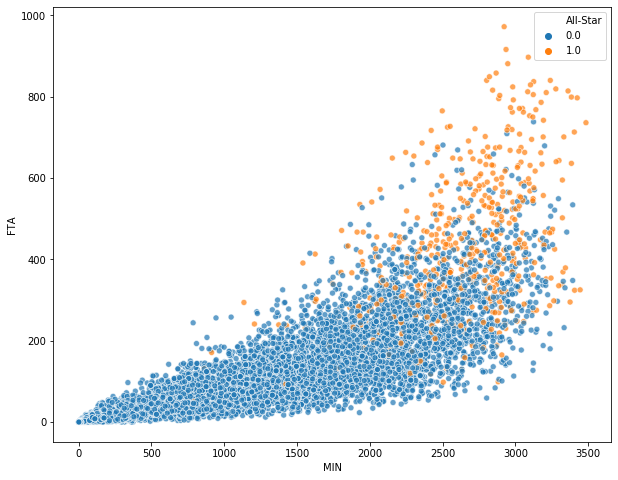

In [36]:
#Want to make it so the ll-star points are more visable
plt.figure(figsize = (10, 8))
sns.scatterplot(y=df['FTA'],x = df['MIN'],hue=df['All-Star'], alpha=.7);

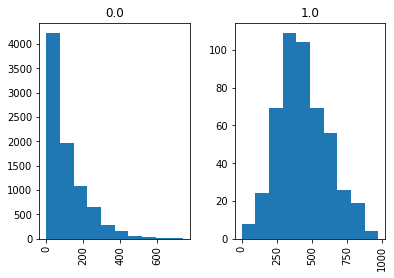

In [37]:
#Hoping to overlap these with different 
df.FTA.hist(by=df['All-Star']);

In [38]:
df[(df['FTA'] >= 800) & (df['All-Star']==1)][['PLAYER','FTA','GP']].sort_values('FTA')

,PLAYER,FTA,GP
5665,Dwyane Wade_2006,803.0,75.0
2095,Kevin Durant_2014,805.0,81.0
3021,Jerry Stackhouse_2001,810.0,80.0
5868,Paul Pierce_2006,812.0,79.0
5790,LeBron James_2006,814.0,79.0
4291,Dwight Howard_2010,816.0,82.0
5780,Kobe Bryant_2006,819.0,80.0
2512,James Harden_2015,824.0,81.0
5534,Allen Iverson_2006,829.0,72.0
1543,James Harden_2016,837.0,82.0


In [39]:
df[(df['FTA'] >= 700) & (df['All-Star']==0)][['PLAYER','FTA','GP','MIN']].sort_values('FTA')

,PLAYER,FTA,GP,MIN
5598,Carmelo Anthony_2006,709.0,80.0,2941.0
3126,Paul Pierce_2001,738.0,82.0,3124.0


In [40]:
df[df['PTS'] == 0].shape

(101, 31)

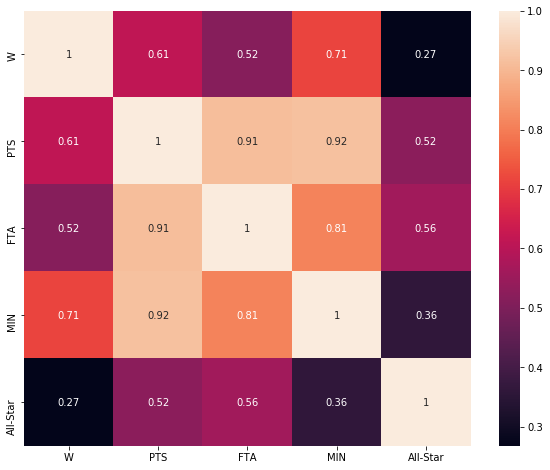

In [41]:
plt.figure(figsize = (10, 8))
sns.heatmap(df[['W','PTS','FTA','MIN', 'All-Star']].corr(),annot= True);

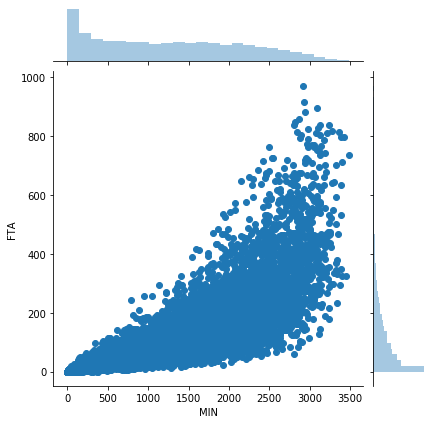

In [42]:
#df.PTS.hist()
sns.jointplot(df['MIN'],df['FTA']);

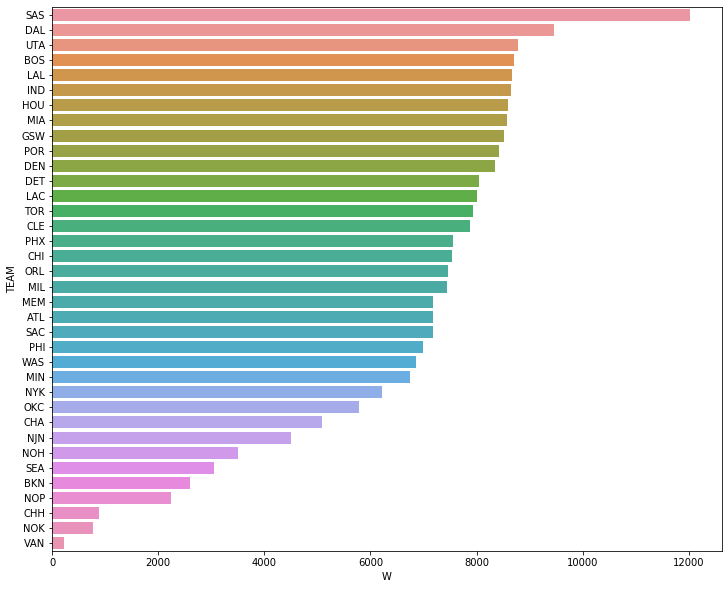

In [43]:
plt.figure(figsize=(12,10))
total_wins = df.groupby('TEAM', as_index=False)['W'].sum()
sns.barplot(x='W', y='TEAM', data=total_wins.sort_values(ascending=False, by='W'))

In [44]:
df = df.dropna()

In [45]:
df['All-Star'].value_counts()

0.0    8456
1.0     488
Name: All-Star, dtype: int64